# KC Housing data

Hi Greg, this is mostly so I can play with git but once we're both comfortable I was thinking that we could use this as the final jupyter notebook.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
print('View ' + str(round(df.isna().sum()['view']/len(df.view) *100, 2)) + ' % NaN')

print('Waterfront ' + str(round(df.isna().sum()['waterfront']/len(df.waterfront) *100, 2)) + ' % NaN')

print('Year Renovated ' + str(round(df.isna().sum()['yr_renovated']/len(df.yr_renovated) *100, 2)) + ' % NaN')

View 0.29 % NaN
Waterfront 11.0 % NaN
Year Renovated 17.79 % NaN


In [5]:
# Change all strange header names to ones we like

df = df.rename(columns={'date' : 'date_sold'})
df = df.rename(columns={'price' : 'price_sold'})
df = df.rename(columns={'bathrooms' : 'bathrooms_per_bedroom'})
df = df.rename(columns={'view' : 'view_grade'})
df = df.rename(columns={'sqft_above' : 'sqft_not_basement'})
df = df.rename(columns={'sqft_living15' : 'sqft_living_15_neighbours'})
df = df.rename(columns={'sqft_lot15' : 'sqft_lot_15_neighbours'})

In [6]:
# SAY WHY WE USE MEDIAN

df = df.fillna(value={'yr_renovated' : 0})
df = df.fillna(value={'view_grade' : df.view_grade.median()})
df = df.fillna(value={'waterfront' : df.waterfront.median()})

In [7]:
# EXPLAIN MATHS

df.sqft_basement = (df.sqft_living - df.sqft_not_basement)

In [8]:
# WHY INT64

df.date_sold = pd.to_datetime(df.date_sold)
df.yr_renovated = df.yr_renovated.astype('int64')

In [9]:
df["coordinates"]=list(zip(df.lat,df.long))


In [10]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms_per_bedroom,sqft_living,sqft_lot,floors,waterfront,view_grade,...,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours,coordinates
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,"(47.5112, -122.257)"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,"(47.721000000000004, -122.319)"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,"(47.7379, -122.23299999999999)"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,"(47.5208, -122.39299999999999)"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,"(47.6168, -122.045)"


In [245]:
df=df.drop(index=15856,axis=0)

KeyError: '[15856] not found in axis'

In [269]:
df.yr_built.describe()

count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

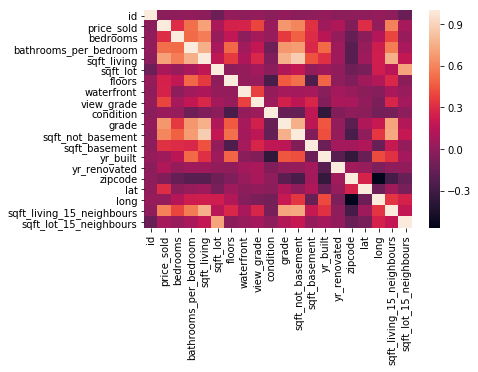

In [33]:
sns.heatmap((df.corr()))

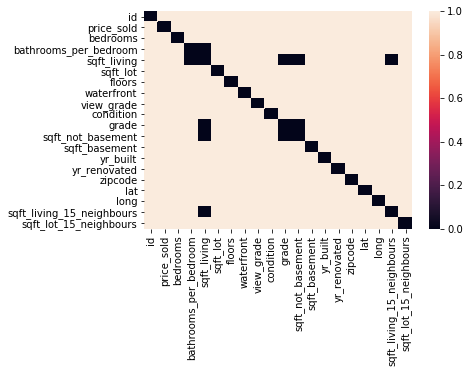

In [30]:
sns.heatmap((df.corr()<0.75)&(df.corr()>-0.75))

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


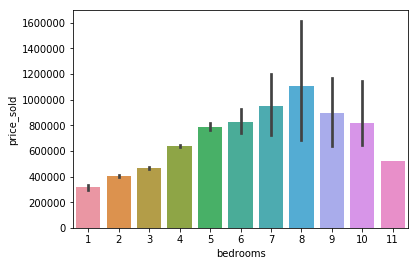

In [246]:
sns.barplot(x="bedrooms",y="price_sold",data=df)

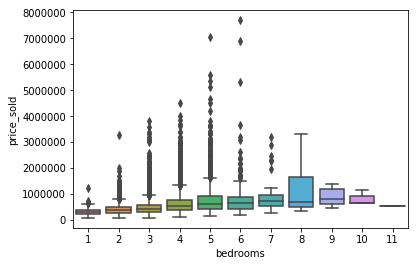

In [247]:
sns.boxplot(x="bedrooms",y="price_sold",data=df)

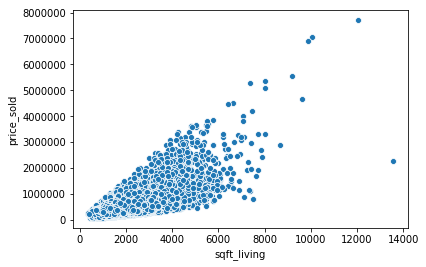

In [14]:
sns.scatterplot(x="sqft_living",y="price_sold",data=df)

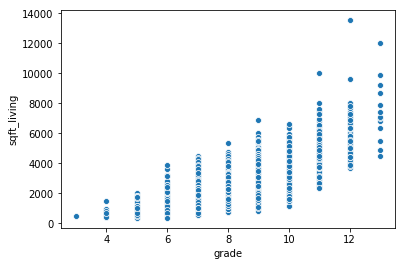

In [32]:
sns.scatterplot(x="grade",y="sqft_living",data=df)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


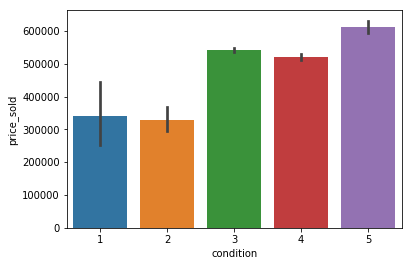

In [15]:
sns.barplot(x="condition",y="price_sold",data=df)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


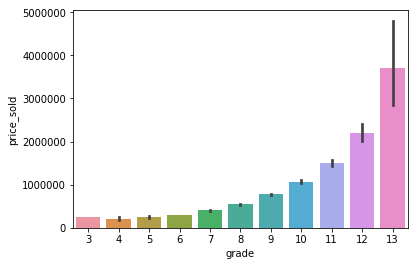

In [274]:
sns.barplot(x="grade",y="price_sold",data=df)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


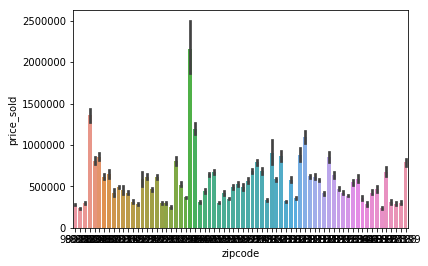

In [17]:
sns.barplot(x="zipcode",y="price_sold",data=df)

In [18]:
# sns.barplot(x="condition",y="zipcode",data=df)

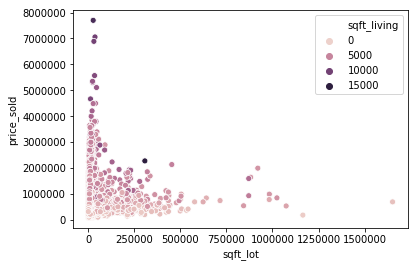

In [276]:
# Not perfectly correalated whereas living area is.
sns.scatterplot(x="sqft_lot",y="price_sold",data=df,hue="sqft_living")

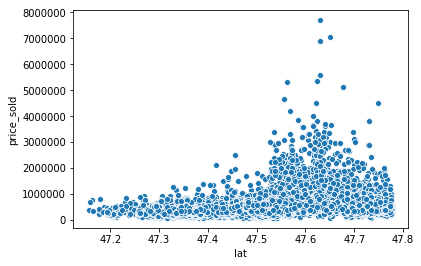

In [42]:
sns.scatterplot(x="lat",y="price_sold",data=df)

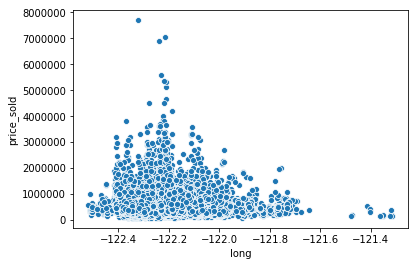

In [177]:
sns.scatterplot(x="long",y="price_sold",data=df)

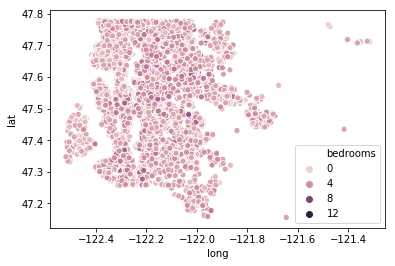

In [248]:
#Even distribution of bedrooms
sns.scatterplot(x="long",y="lat",data=df,hue="bedrooms")

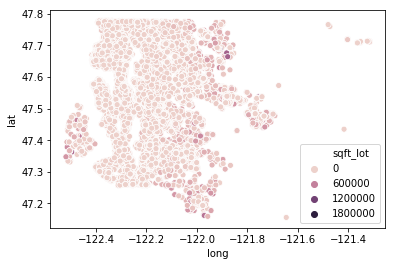

In [249]:
# Lot size does not correlate with most expensive neighbourhood
sns.scatterplot(x="long",y="lat",data=df,hue="sqft_lot")

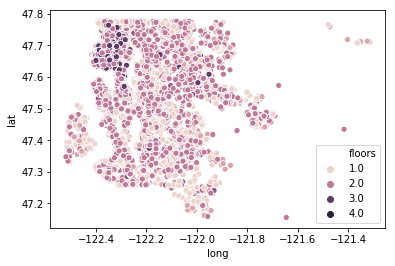

In [252]:
#Shows high density housing => Not proportional to price
sns.scatterplot(x="long",y="lat",data=df,hue="floors")

In [281]:
df.price_sold.describe()

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price_sold, dtype: float64

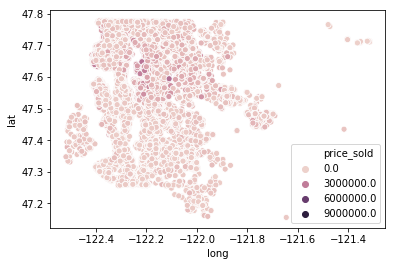

In [262]:
sns.scatterplot(x="long",y="lat",data=df,hue="price_sold")

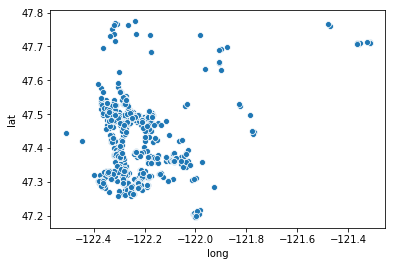

In [280]:
sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]<200000),:])

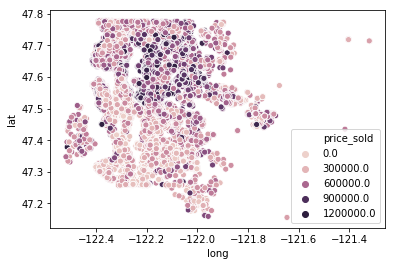

In [268]:
sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]<1000000)&(df["price_sold"]>200000),:],hue="price_sold")

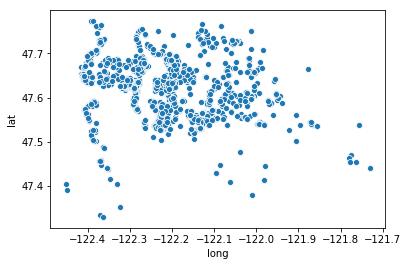

In [234]:
sns.scatterplot(x="long",y="lat",data=df.loc[(df["price_sold"]>1000000),:])

In [271]:
# import geopandas

# gdf = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))


In [ ]:
"""
We don't have linear relationship for variables which affect price => bedrooms, sqft-living etc. => peaks and drops off


"""